## 📝 Instruction

1. **Mount the Calibration Plate:** Secure the calibration plate at the designated location on the robot.
2. **Set the robot IP address:** In the box below set the robot IP address.
3. **Run the Code:** Execute the code provided below.
4. **Position the Robot Head:**
   - At the beginning, you'll be prompted to confirm if the robot's head is touching the calibration plate.
   - Before doing this, ensure the motors are disabled.
   - Manually move the robot's head to the calibration plate and carefully position it so that it is properly seated inside the plate.
   - Once positioned correctly, enter `y` and press `Enter` to continue.
5. **Retrieve the Calibration Matrix:**
   - The program will then run, and upon completion, it will output the calibration matrix labeled as `T_cam_2_j4`.
   - Be sure to save this matrix for future use with the camera.
   - Any result under `1mm` average error is considered excellent.

In [1]:
robot_ip = "192.168.254.67" # robot ip address 

In [2]:
"""
necessary modules
"""
%matplotlib widget
from dorna_vision import util, draw, calibration
import matplotlib.pyplot as plt
from camera import Camera
from dorna2 import Dorna, Kinematic
import cv2
import numpy as np
import itertools
from scipy.optimize import minimize
from IPython.display import display, clear_output
import random

In [3]:
"""
System parameters
"""
robot_model = "dorna_ta" # robot model

"""
aruco board parameters
"""
aruco_id = 17 # detected marker
aruco_length= 24 # length in mm
aruco_dic="DICT_4X4_100" # aruco type
aruco_refine="CORNER_REFINE_APRILTAG"
aruco_subpix=False
aruco_coordinate="CCW"

# search area
joint_deviation = []
joint_deviation += list(itertools.product([-20, -15, -10, -5, 0, 5, 10, 15], [0], [0], [0], [-32, -30, -25, -20, -15, -10, -5, 0, 5],[0]))

# collected data
collected_data = []

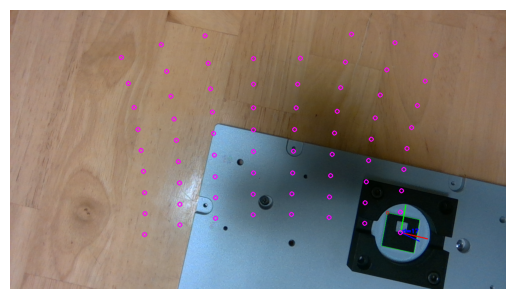

avg error (mm):  0.988366350313645
### T_cam_2_j4 ###
 [[0.010943887103459813, -0.9999341003666327, -0.0038674619037596144, 50.27236517370847], [0.9997735117091237, 0.010878692403868672, -0.018211214507866908, 33.50026421799676], [0.018252578444525054, 0.003667284493332018, 0.999826682182753, -4.748022881116398], [0.0, 0.0, 0.0, 1.0]] 
##################


True

In [5]:
# camera
camera = Camera()
print("Camera connected: ", camera.connect(filter={}))

# Robot
robot = Dorna()
print("Robot connected: ", robot.connect(robot_ip))

# kinematics
kinematic = Kinematic(robot_model)

# update collected data
collected_data.append(calibration.dorna_ta_eye_in_hand_camera_kit(robot, kinematic, camera, np.array(joint_deviation), aruco_id, aruco_length, aruco_dic, aruco_refine, aruco_subpix, aruco_coordinate))  

# ground truth
gt = collected_data[0][0]["t_target_2_base"]

# transformation matrix
T_cam_2_j4 = calibration.minimizer(collected_data, kinematic , use_aruco = False, use_ground_truth= True)

# print result
print("### T_cam_2_j4 ###\n",np.matrix.tolist(T_cam_2_j4), "\n##################")

# close the connections
camera.close()
robot.close()